# Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Seaborn é uma biblioteca de visualização Python baseada em matplotlib.

Seaborn é apenas envolvida pelo matplotlib. Ele adiciona estilos para tornar as visualizações de dados padrão muito mais atraentes visualmente e torna a criação de tipos específicos de plotagens complicadas muito mais simples.


Em seguida, vamos criar uma série de pandas v1 com 1.000 números extraídos de uma distribuição normal com média 0 e desvio padrão de 10. Vamos também criar uma segunda série de pandas, v2, que é 2 vezes v1, mais 1.000 números extraídos de uma distribuição normal com média de 60 e desvio padrão de 15.

In [2]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

Agora vamos ver como ficam os histogramas dessas duas variáveis quando as plotamos lado a lado.

Podemos definir alfa igual a 0,7 para que os histogramas não se cubram.

Para o parâmetro bin, em vez de inteiro denotando o número de compartimentos que queremos, também podemos passar em uma sequência específica usando np.arange para especificar os compartimentos específicos que queremos usar.
9
Isso é útil quando queremos plotar dois histogramas na mesma figura para garantir que os tamanhos dos compartimentos sejam equivalentes para ambos os histogramas.

Também adicionamos rótulos para que possamos ver qual histograma pertence a qual variável usando uma legenda.

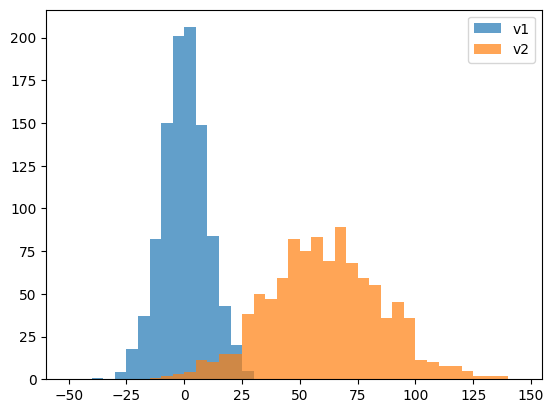

In [4]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

Observando os histogramas, podemos ver rapidamente que v1 tem uma média menor que v2 e que v2 tem um spread maior que v1.

Mesmo que até este ponto tenhamos usado apenas o matplotlib para plotagem, vemos que mesmo a importação do Seaborn mudou a estética do plot para um estilo diferente do matplotlib padrão.

Vamos visualizar esses histogramas novamente, mas de uma maneira diferente.

Primeiro, vamos passar ambas as séries v1 e v2 em uma lista. E defina o histtype como barstacked.

Definir 'normed' como True normalizará o histograma para formar uma densidade de probabilidade.

Em seguida, vamos criar uma variável v3, que é a combinação de v1 e v2.

Usaremos v3 para traçar um gráfico de estimativa de densidade do kernel sobre o histograma empilhado. O gráfico de estimativa de densidade de kernel estima a função de densidade de probabilidade da variável v3. Plotá-lo sobre os histogramas empilhados de v1 e v2 nos permite ver a relação entre essas duas visualizações.

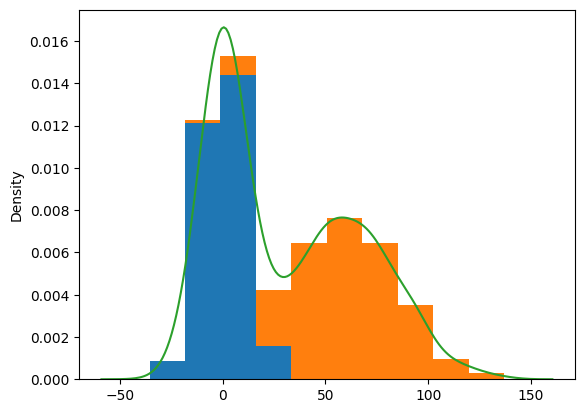

In [5]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', density=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

Seaborn fornece uma função conveniente para esses tipos de gráficos sns.distplot. Vamos dar uma olhada em como ele funciona.

Podemos passar a variável que queremos visualizar junto com argumentos de palavra-chave para cada um dos componentes individuais do gráfico. Vamos definir a cor do histograma como azul-petróleo e a cor do KDE como marinho.

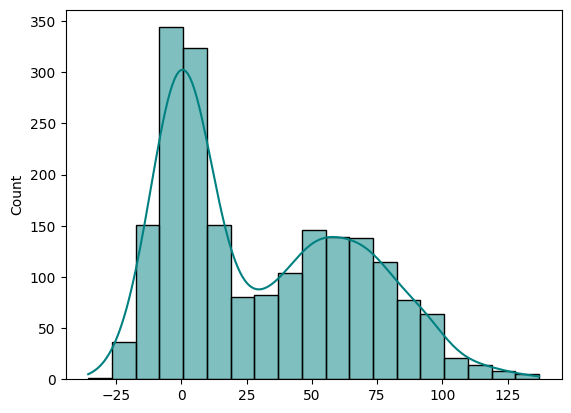

In [6]:
plt.figure()

sns.histplot(v3, color='Teal', kde=True);

Agora vamos ver um exemplo de um dos tipos de plotagens complexas para as quais Seborn fornece uma interface conveniente, a plotagem conjunta.

O jointplot cria um gráfico de dispersão ao longo dos histogramas para cada variável individual em cada eixo.

Na verdade, você viu jointplots no módulo dois e os criou manualmente.

Para criar um jointplot, basta digitar sns.jointplot e passar nas duas séries, v1 e v2.

Definir alfa como 0,4 ajudará na visualização de pontos sobrepostos. O jointplot permite visualizar a distribuição das duas variáveis individualmente. Bem como as relações entre as variáveis. Usando jointplot podemos ver que v1 e v2 parecem ser variáveis normalmente distribuídas que são positivamente correlacionadas. Como o Seaborn usa o matplotlib, podemos ajustar os gráficos usando as ferramentas do Matplotlib.

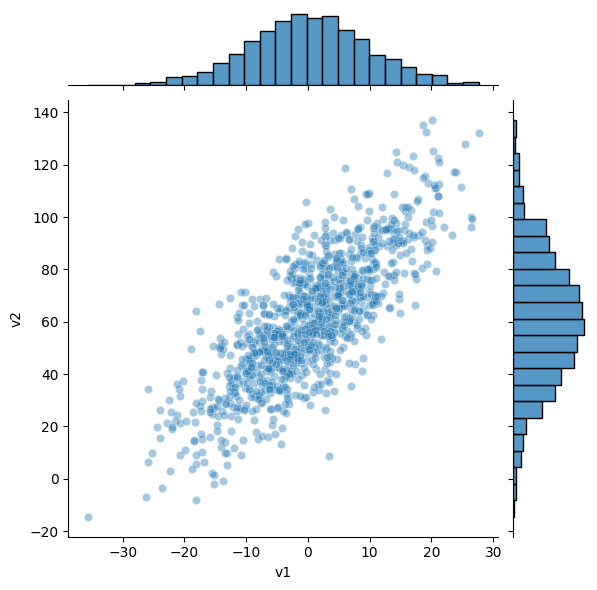

In [8]:
sns.jointplot(x=v1, y=v2, alpha=0.4);

Algumas das funções de plotagem em Seaborn retornam um objeto de eixo matplotlib. Enquanto outros operam em uma figura inteira e produzem plots com vários painéis, retornando um objeto de grade Seaborn.

Em ambos os casos, matplotlib pode ser usado para ajustar ainda mais os gráficos. Por exemplo, sns.jointplot retorna um objeto de grade Seaborn.

A partir disso, podemos plotar um objeto do eixo de plotagem do mapa usando grid.ax_joint.

Em seguida, podemos definir a proporção como igual, usando set_aspect equal. Os gráficos hexbin são a contraparte bivariada dos histogramas. Os gráficos hexbin mostram o número de observações que se enquadram em caixas hexagonais.

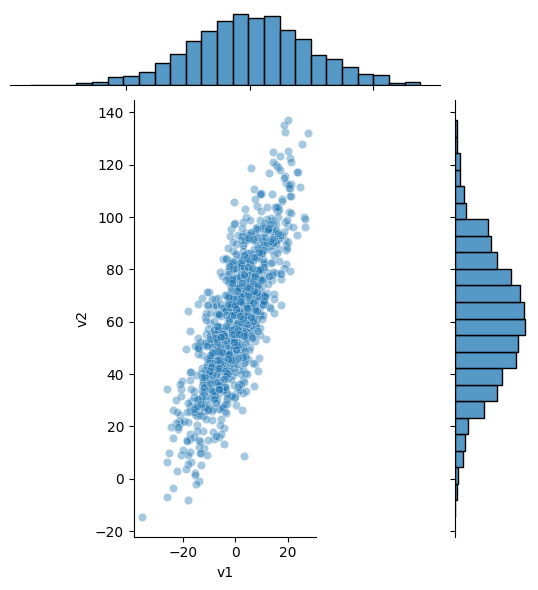

In [13]:
grid = sns.jointplot(x=v1, y=v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

Sns joint plot inclui o estilo hex bin que podemos usar passando em hex para o parâmetro kind.

O estilo de gráfico hexbin funciona bem com conjuntos de dados relativamente grandes. Outra boa opção para visualizar a distribuição de conjuntos de dados são as estimativas de densidade do kernel ou gráficos do KDE. Você pode pensar nos gráficos bidimensionais do KDE como a versão contínua do gráfico de junção hexagonal.

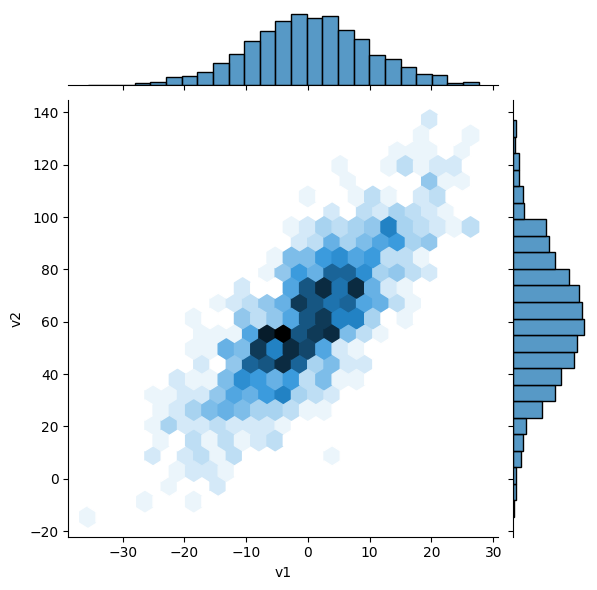

In [14]:
sns.jointplot(x=v1, y=v2, kind='hex');

Primeiro, vamos dizer a Seaborn para usar um estilo diferente usando sns.set_style('white').

Todos os gráficos a seguir terão a grade cinza desativada.

Agora vamos criar um gráfico conjunto como antes, exceto que desta vez, vamos definir o tipo para kde.

Por fim, vamos espaçar para 0, o que plotará as distribuições marginais diretamente na borda do gráfico de dispersão. Podemos ver que o Seaborn possui algumas opções integradas para facilitar a personalização. E nos fornece gráficos bonitos e fáceis de criar para explorar as distribuições de seus dados. Na última parte deste tutorial, vamos carregar o conjunto de dados da íris para ver como Seaborn lida com visualizações de dados categóricos.

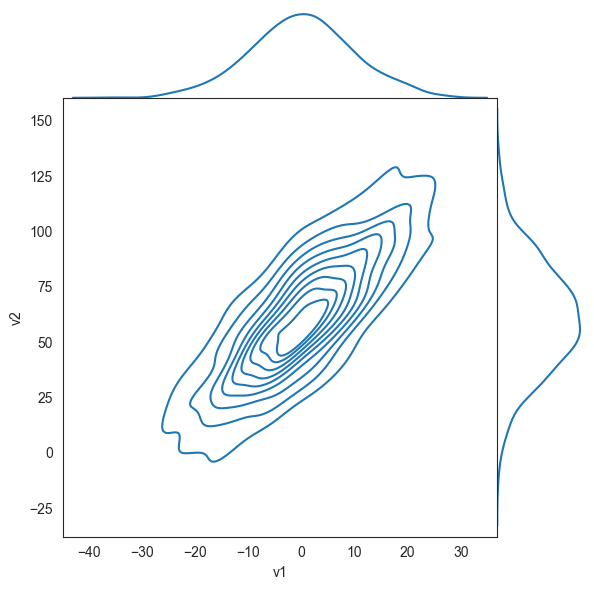

In [17]:
sns.set_style('white')

sns.jointplot(x=v1, y=v2, kind='kde', space=0);

Semelhante aos pandas, o Seaborn possui uma função integrada que cria uma matriz de gráfico de dispersão.


In [19]:
iris = pd.read_csv('../assets/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Digamos para o seabornmapear o nome para cores diferentes usando o parâmetro hue.

E digamos a ele para usar um kde ao longo das diagonais em vez dos histogramas padrão.

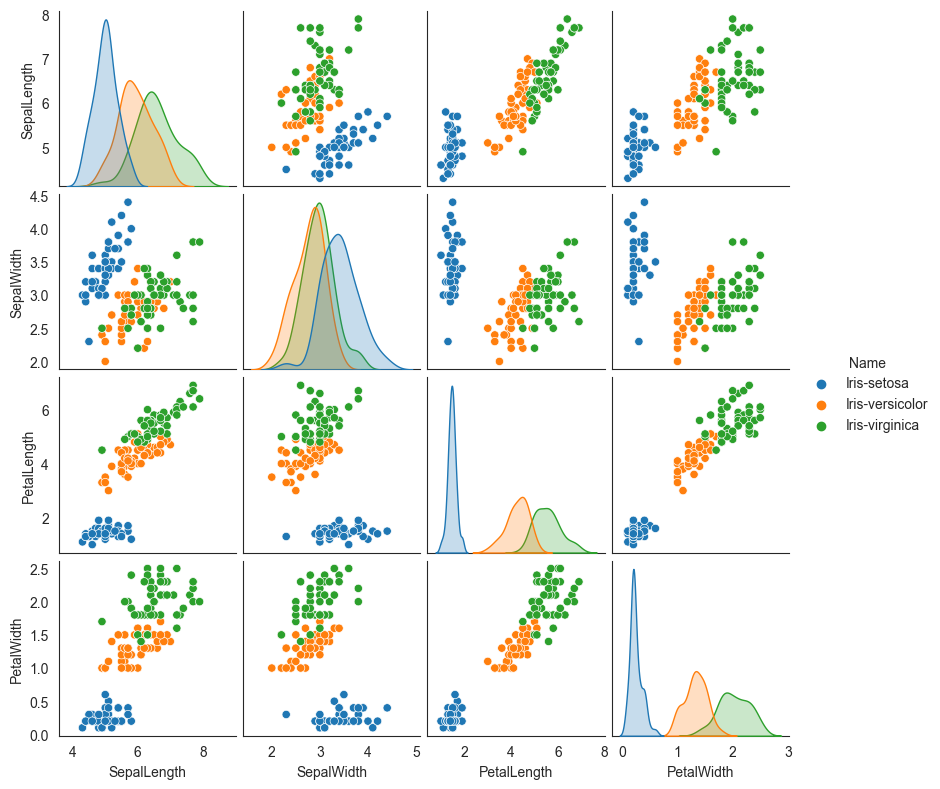

In [20]:
sns.pairplot(iris, hue='Name', diag_kind='kde', height=2);

Observando o gráfico de pares, fica claro que existem alguns clusters no conjunto de dados. Parece que o comprimento do peddle e a largura do peddle são boas opções para separar as observações, enquanto a largura não é um separador forte.

Usar o gráfico de pares para examinar seu quadro de dados pode ser uma ferramenta muito útil na análise exploratória de dados. Um plot final que gostaria de mostrar a vocês é chamada de plot do violino.

Você pode pensar em um enredo de violino como uma versão mais informativa de um gráfico de caixa.

Para demonstrar, vamos traçar um gráfico de violino ao lado de um gráfico de enxame, que você pode imaginar como um gráfico de dispersão para dados categóricos.
Primeiro vamos criar uma nova figura e um sublplot.
Em seguida, criaremos o swarmplot, passando Name e PetalLength, e os dados, que é o quadro de dados da íris.
Para o próximo subplot, criaremos o violinplot, passando novamente em Name, PetalLength e o quadro de dados da íris.

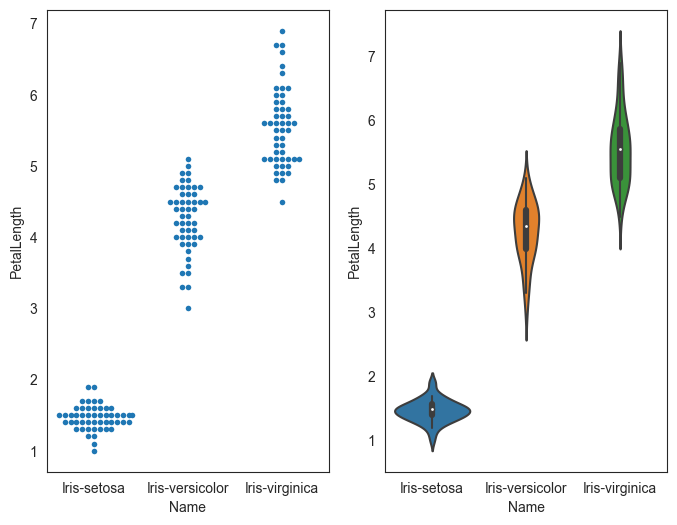

In [23]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot(x='Name', y='PetalLength', data=iris, size=4);
plt.subplot(122)
sns.violinplot(x='Name', y='PetalLength', data=iris);

Olhando para o swarmplot, cada espécie tem sua própria coluna e o comprimento da pétala de cada observação é mostrado. Com valores mais comuns aparecendo como as partes largas do cluster, muito parecido com um histograma.

O violinplot é como um gráfico de caixa com uma estimativa de densidade de kernel girada em cada lado.

Violin plots transmitem mais informações do que box plots e são capazes de mostrar fenômenos particulares dentro da distribuição que box plots são incapazes de transmitir, como multimodalidade. Seaborn é uma biblioteca que não apenas adiciona novos estilos e aspectos visuais. Mas também apresenta novas funcionalidades, como plotagens conjuntas, plotagens de matriz de dispersão e plotagens de violino.

O Seaborn está sendo desenvolvido ativamente e é fácil de instalar, o que o torna uma parte indispensável do kit de ferramentas de um cientista de dados. Mas tenha em mente que esta é uma funcionalidade construída sobre o matplotlib, e estes são em grande parte os artistas do matplotlib sendo usados. Então, se você tem alguma ideia para uma nova visualização estatística ou leu sobre uma em uma publicação ou jornal. Você deve ter a capacidade de criar seus próprios kits de ferramentas de visualização.

É isso para o tutorial de Seaborn, obrigado por assistir, plotagem feliz.